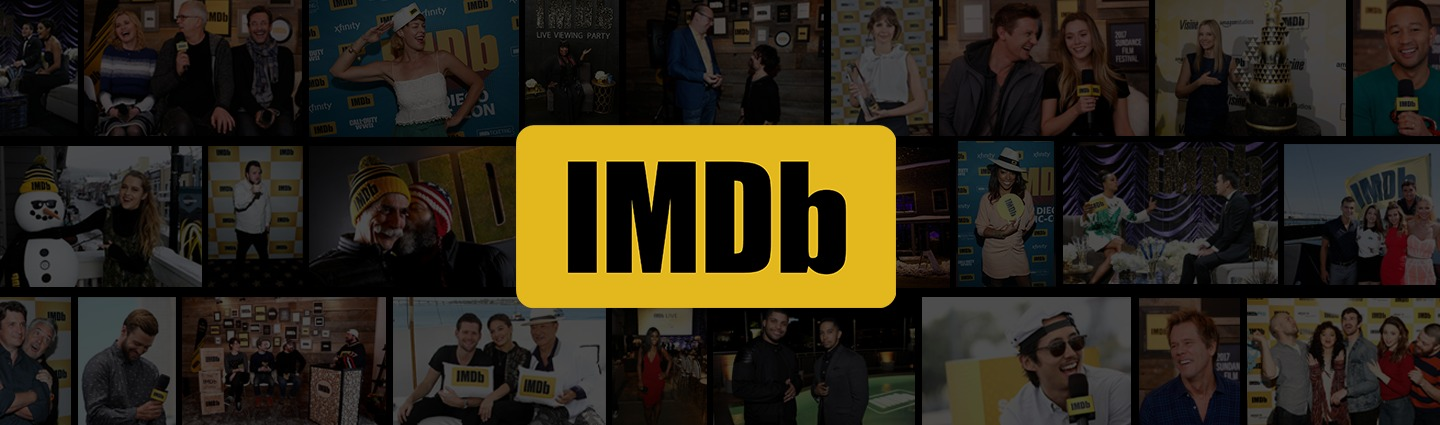

# Importação das bibliotecas e carregamento do dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('dataset.csv')

print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(5000, 12)
tconst              object
primaryTitle        object
startYear            int64
rank                 int64
averageRating      float64
numVotes             int64
runtimeMinutes       int64
directors           object
writers             object
genres              object
IMDbLink            object
Title_IMDb_Link     object
dtype: object
tconst              0
primaryTitle        0
startYear           0
rank                0
averageRating       0
numVotes            0
runtimeMinutes      0
directors           0
writers            26
genres              0
IMDbLink            0
Title_IMDb_Link     0
dtype: int64


# Tratamento dos dados

## Remoção de colunas que não serão **úteis**

In [ ]:
df = df.drop(['tconst', 'IMDbLink', 'Title_IMDb_Link'], axis=1)

## Tratamento dos casos **NaN**

In [ ]:
df.isna().sum()

,0
primaryTitle,0
startYear,0
rank,0
averageRating,0
numVotes,0
runtimeMinutes,0
directors,0
writers,26
genres,0


In [ ]:
print(df[df.isna().any(axis=1)])

                                  primaryTitle  startYear  rank  \
150   David Attenborough: A Life on Our Planet       2020   151   
390                                  Free Solo       2018   391   
546                                Citizenfour       2014   547   
563                           What Is a Woman?       2022   564   
566                         The Act of Killing       2012   567   
574                    They Shall Not Grow Old       2018   575   
583                                Hoop Dreams       1994   584   
584                  Won't You Be My Neighbor?       2018   585   
712                 Exit Through the Gift Shop       2010   713   
770                                 Seaspiracy       2021   771   
788                                  Apollo 11       2019   789   
978                                        Amy       2015   979   
1007                      Jiro Dreams of Sushi       2011  1008   
1024                           Black Hawk Down       1997  102

In [ ]:
df = df.fillna("Desconhecido")
df.isna().sum()

,0
primaryTitle,0
startYear,0
rank,0
averageRating,0
numVotes,0
runtimeMinutes,0
directors,0
writers,0
genres,0


# Análise exploratória

## Notas médias dos filmes

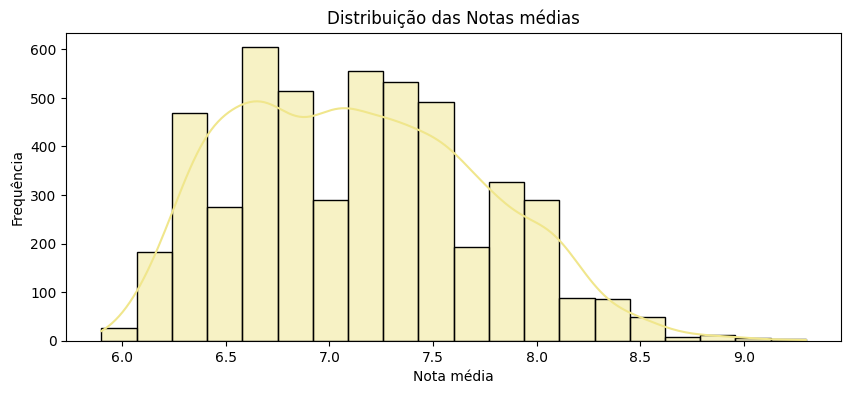

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Distribuição das Notas médias')
sns.histplot(df['averageRating'], bins=20, kde=True, color='khaki')
plt.xlabel('Nota média')
plt.ylabel('Frequência')
plt.show()

In [ ]:
media_notas = df['averageRating'].mean()
print(f"A média das notas dos filmes é: {media_notas:.2f}")

A média das notas dos filmes é: 7.14


In [ ]:
q1 = df['averageRating'].quantile(0.25)
q2 = df['averageRating'].quantile(0.50)
q3 = df['averageRating'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
outliers = df[(df['averageRating'] < limite_inferior) | (df['averageRating'] > limite_superior)]

print(f"Q1: {q1:.2f}")
print(f"Q2 (mediana): {q2:.2f}")
print(f"Q3: {q3:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")
print(f"Número de outliers: {outliers.shape[0]}")

Q1: 6.70
Q2 (mediana): 7.10
Q3: 7.60
IQR: 0.90
Limite inferior: 5.35
Limite superior: 8.95
Número de outliers: 8


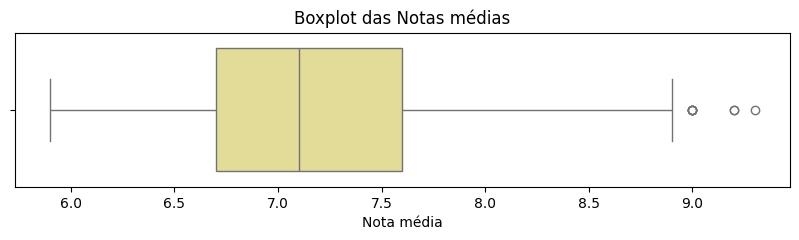

In [ ]:
plt.figure(figsize=(10, 2))
plt.title('Boxplot das Notas médias')
sns.boxplot(x=df['averageRating'], color='khaki',)
plt.xlabel('Nota média')
plt.show()

In [ ]:
print(outliers['averageRating'].value_counts())

averageRating
9.0    5
9.2    2
9.3    1
Name: count, dtype: int64


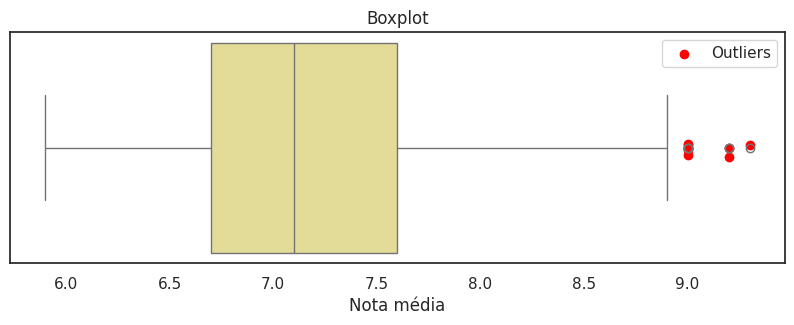

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['averageRating'], color='khaki')

y_jitter = np.random.normal(loc=0, scale=0.02, size=len(outliers))
plt.scatter(outliers['averageRating'], y_jitter, color='red', label='Outliers')

plt.title("Boxplot")
plt.xlabel("Nota média")
plt.legend()
plt.show()

Quais são os filmes com as maiores notas médias?

In [ ]:
print(outliers[['primaryTitle', 'averageRating']])

                                     primaryTitle  averageRating
0                        The Shawshank Redemption            9.3
1                                   The Godfather            9.2
2                                 The Dark Knight            9.0
3   The Lord of the Rings: The Return of the King            9.0
4                                Schindler's List            9.0
5                           The Godfather Part II            9.0
6                                    12 Angry Men            9.0
50                                The Chaos Class            9.2


## Número de votos de cada filme

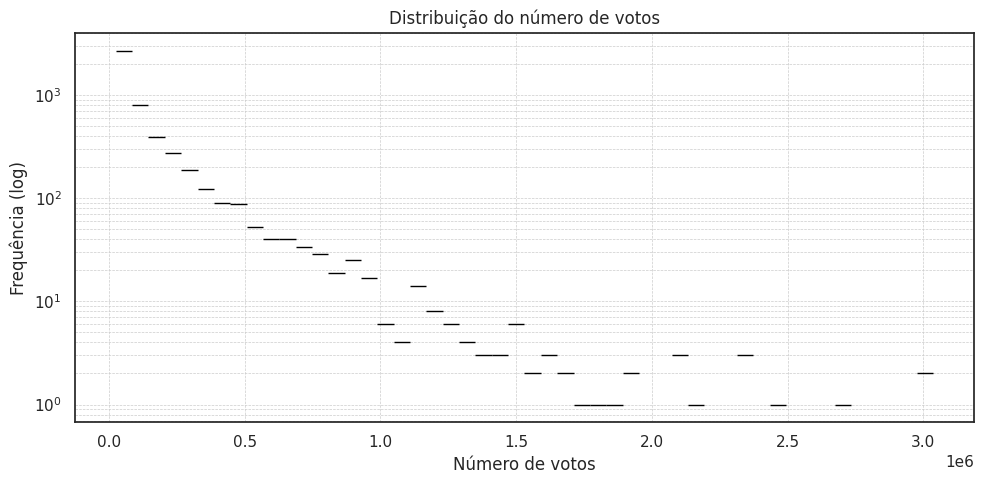

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['numVotes'], bins=50, log_scale=(False, True), kde=False, color='steelblue', edgecolor='black')
plt.title('Distribuição do número de votos')
plt.xlabel('Número de votos')
plt.ylabel('Frequência (log)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Quais são os filmes mais votados?

In [ ]:
print(df[['primaryTitle', 'numVotes']].sort_values(by='numVotes', ascending=False).head(10))

                                         primaryTitle  numVotes
0                            The Shawshank Redemption   3035876
2                                     The Dark Knight   3012646
9                                           Inception   2675889
10                                         Fight Club   2457083
11                                       Forrest Gump   2372823
14                                       Interstellar   2335457
7                                        Pulp Fiction   2329143
15                                         The Matrix   2150227
1                                       The Godfather   2119269
8   The Lord of the Rings: The Fellowship of the Ring   2102836


## Duração dos filmes

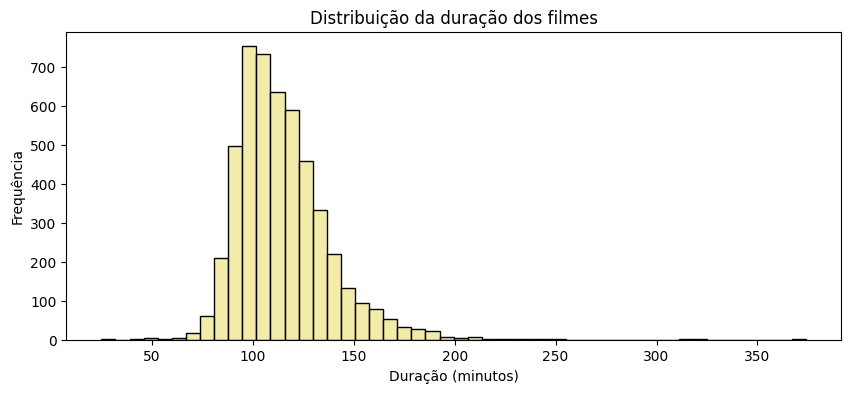

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Distribuição da duração dos filmes')
sns.histplot(df['runtimeMinutes'], bins=50, color='khaki')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
plt.show()

In [ ]:
duração_média = df['runtimeMinutes'].mean()
print(f"A duração média dos filmes é: {duração_média:.2f} minutos")

A duração média dos filmes é: 114.57 minutos


##Ano de lançamento

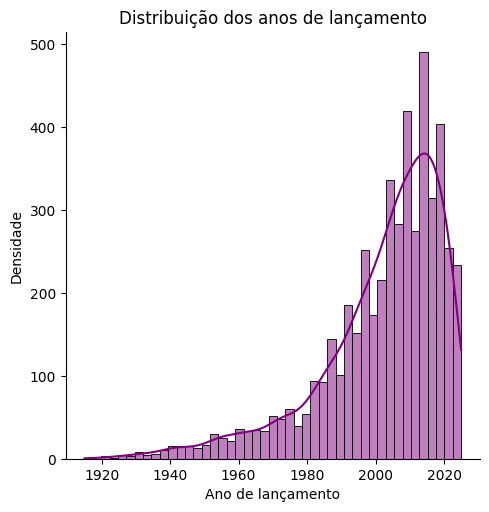

In [ ]:
sns.displot(df['startYear'], kde=True, color='purple')
plt.title('Distribuição dos anos de lançamento')
plt.xlabel('Ano de lançamento')
plt.ylabel('Densidade')
plt.show()

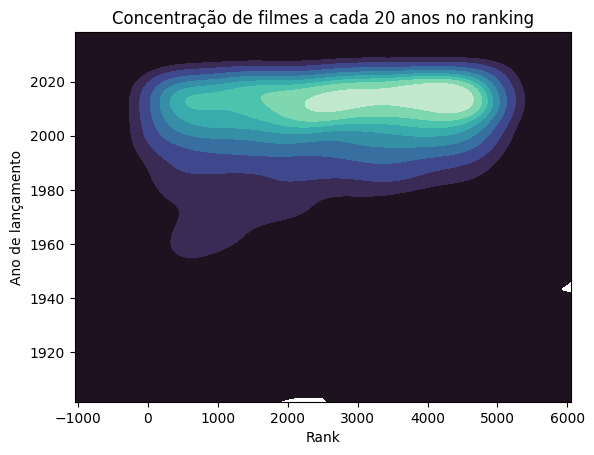

In [ ]:
sns.kdeplot(data=df, x='rank', y='startYear', color='r', fill=True, cmap="mako", thresh=False)
plt.title('Concentração de filmes a cada 20 anos no ranking')
plt.xlabel('Rank')
plt.ylabel('Ano de lançamento')
plt.show()

##Gênero vs Ranking


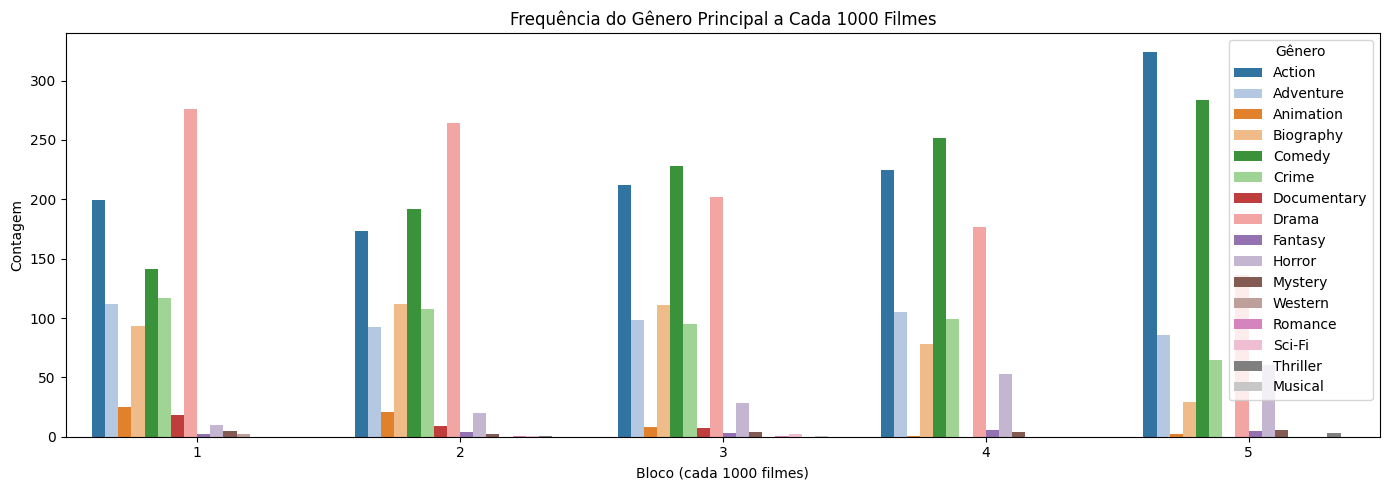

In [ ]:
df['Gênero'] = df['genres'].str.split(',').str[0]

df['Rank'] = (df.index // 1000) + 1

freq_df = df.groupby(['Rank', 'Gênero']).size().reset_index(name='Contagem')

plt.figure(figsize=(14, 5))
sns.barplot(data=freq_df, x='Rank', y='Contagem', hue='Gênero', palette='tab20')
plt.xlabel('Bloco (cada 1000 filmes)')
plt.title('Frequência do Gênero Principal a Cada 1000 Filmes')
plt.tight_layout()
plt.show()

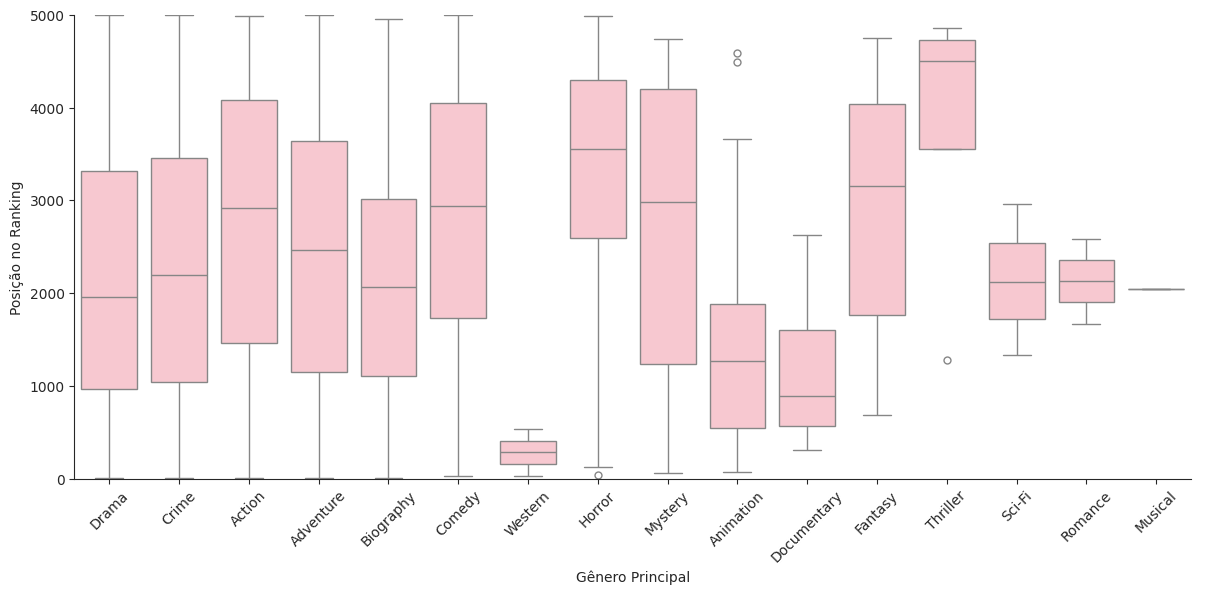

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Gênero", y="rank", data=df, kind="box", height=6, aspect=2, color='pink')
    g.set_axis_labels("Gênero Principal", "Posição no Ranking")
    plt.xticks(rotation=45)
    plt.tight_layout()
    g.ax.set_ylim(0, 5000)
    plt.show()

## Nota média vs Número de votos

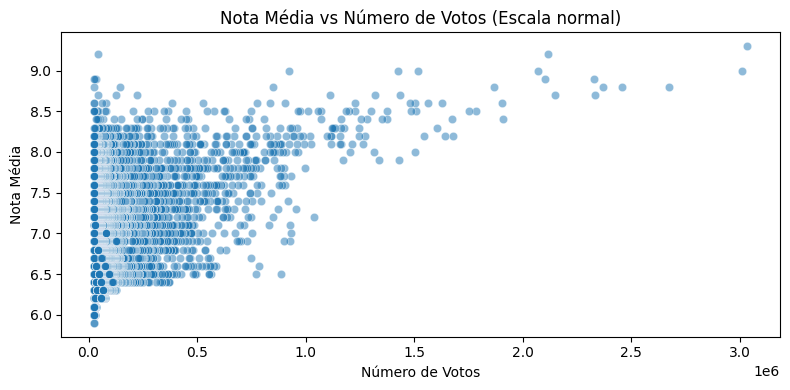

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='numVotes', y='averageRating', alpha=0.5)
plt.title('Nota Média vs Número de Votos (Escala normal)')
plt.xlabel('Número de Votos')
plt.ylabel('Nota Média')
plt.tight_layout()
plt.show()

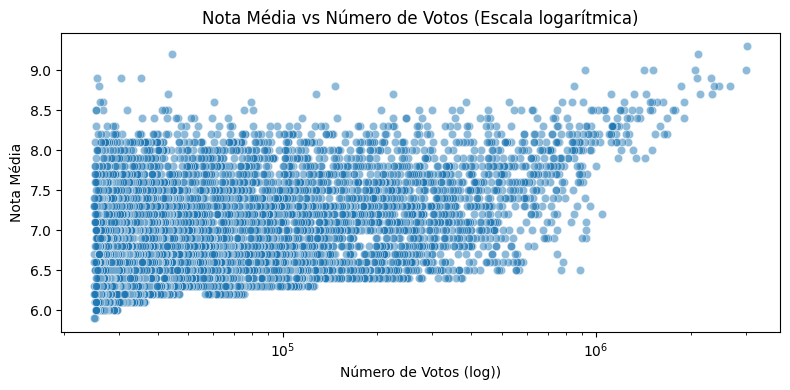

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='numVotes', y='averageRating', alpha=0.5)
plt.xscale('log')
plt.title('Nota Média vs Número de Votos (Escala logarítmica)')
plt.xlabel('Número de Votos (log))')
plt.ylabel('Nota Média')
plt.tight_layout()
plt.show()

## Tempo de filme vs Nota média

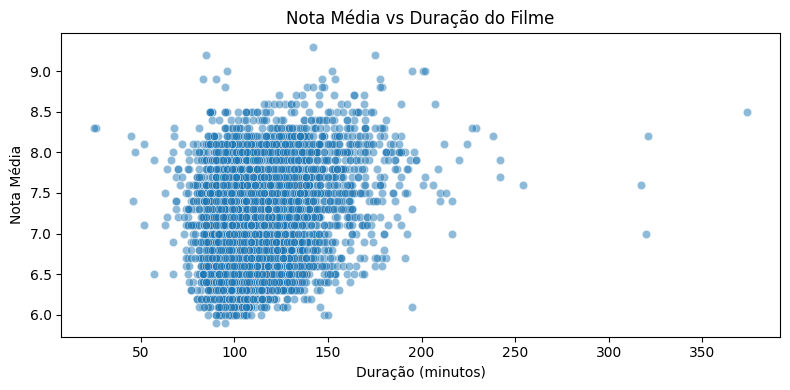

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='runtimeMinutes', y='averageRating', alpha=0.5)
plt.title('Nota Média vs Duração do Filme')
plt.xlabel('Duração (minutos)')
plt.ylabel('Nota Média')
plt.tight_layout()
plt.show()

## Número de votos vs Duração do filme

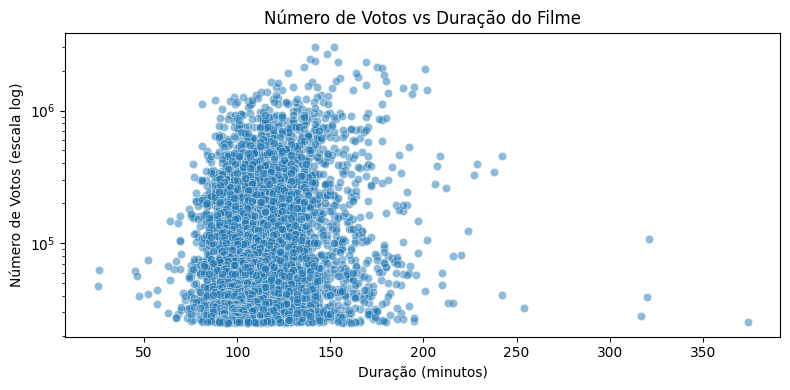

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='runtimeMinutes', y='numVotes', alpha=0.5)
plt.yscale('log')
plt.title('Número de Votos vs Duração do Filme')
plt.xlabel('Duração (minutos)')
plt.ylabel('Número de Votos (escala log)')
plt.tight_layout()
plt.show()

## Matriz de correlação entre as variáveis

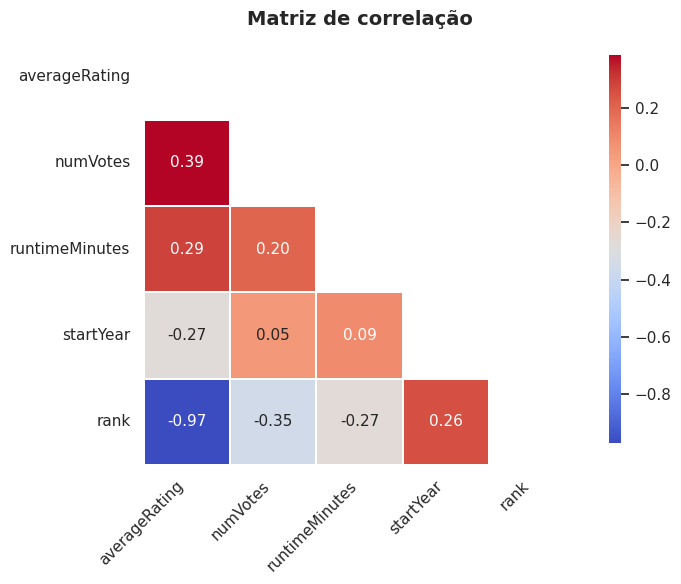

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="white")

numericas = df[['averageRating', 'numVotes', 'runtimeMinutes', 'startYear', 'rank']]
corr = numericas.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size": 11},
    cbar_kws={"shrink": 0.9, "aspect": 30},
    linewidths=0.3,
    square=True
)

plt.title("Matriz de correlação", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
